In [2]:
import tensorflow as tf
from tensorflow import keras
(train_data, train_targets), (test_data, test_targets) =keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

404개의 data points <br>
13개의 독립변수

In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [9]:
train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

종속변수는 미국 Boston에 속한 도시들의 70년대 중반 집들의 중간값 <br>
data point는 도시 <br>
독립변수는 범죄율, 평균 소득 등 <br>
10 = > $ 10K

데이터 표준화하기

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
train_data.shape[1]

13

In [11]:
model = models.Sequential()
# 입력층을 별도로 추가하지 않는다!
model.add(layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


종속변수가 연속변수이기 때문에 마지막 layer에는 node가 하나밖에 없다. 

In [13]:
# Optimizer 종류 => https://keras.io/api/optimizers/
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

In [14]:
model.compile(optimizer=adam, loss='mse')

In [16]:
# model.fit(train_data, train_targets, epochs=80, batch_size=16)
history = model.fit(train_data, train_targets, epochs=80, batch_size=1, validation_split=0.2)

Epoch 1/80
323/323 [==============================] - 0s 613us/step - loss: 5.5903 - val_loss: 12.9291
Epoch 2/80
323/323 [==============================] - 0s 565us/step - loss: 5.6019 - val_loss: 11.2037
Epoch 3/80
323/323 [==============================] - 0s 573us/step - loss: 6.3865 - val_loss: 12.6918
Epoch 4/80
323/323 [==============================] - 0s 569us/step - loss: 7.0374 - val_loss: 8.8258
Epoch 5/80
323/323 [==============================] - 0s 604us/step - loss: 6.0593 - val_loss: 11.6560
Epoch 6/80
323/323 [==============================] - 0s 657us/step - loss: 5.3678 - val_loss: 8.0752
Epoch 7/80
323/323 [==============================] - 0s 622us/step - loss: 5.3522 - val_loss: 9.9472
Epoch 8/80
323/323 [==============================] - 0s 598us/step - loss: 5.1366 - val_loss: 15.3205
Epoch 9/80
323/323 [==============================] - 0s 545us/step - loss: 5.5027 - val_loss: 11.4905
Epoch 10/80
323/323 [==============================] - 0s 561us/step - loss:

323/323 [==============================] - 0s 563us/step - loss: 3.7196 - val_loss: 8.9308


In [19]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

## Loss 값 변화 살펴보기

In [23]:
import matplotlib.pyplot as plt

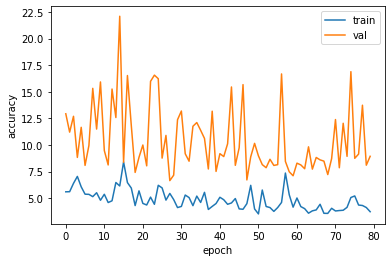

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

# 성능 평가하기

In [20]:
from sklearn.metrics import r2_score

In [21]:
y_pred = model.predict(test_data)
r2_score(test_targets, y_pred)

0.816289409651647